In [1]:
import pandas as pd 
import os

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("titanic.csv")
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

class dataBilgi():
    def __init__(self,dosya):
        self.data = pd.read_csv(dosya)
    def temizle(self):
        self.data.dropna(how='any')
    def bilgi(self):
        self.data.info()

        
class karsılastırma():
    def tablo(index, columns,normalize,  *args):
        index_name=[]
        tab = pd.crosstab(index=index, columns=columns, normalize=normalize)
        for arg in args:
            index_name.append(arg)
        tab.index=index_name
        return tab

class grafikle():
    def __init__(self):
        print(self)
    def factorPlot(column1, column2, hue, data):
        sns.factorplot(column1, column2, hue=hue, data=data)
        plt.show()
    def barPlot(x, y, hue, data):
        sns.barplot(x=x, y=y, hue=hue, data=data)
        plt.show()

        
class onisleme():
    def __init__(self):
        print(self)
    def temizle(self):
        self.data.dropna(how='any')
    def düzenle(self):
        pass
    def stratejiler(self, data):
        pass




In [75]:
class information():
    def __init__(self, file):
        self.data = pd.read_csv(file)

c:\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


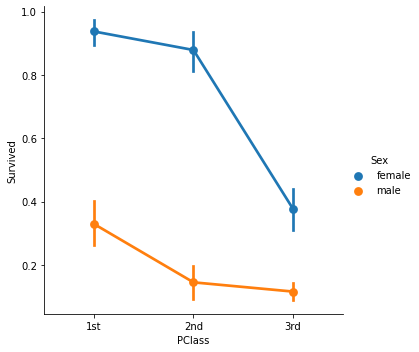

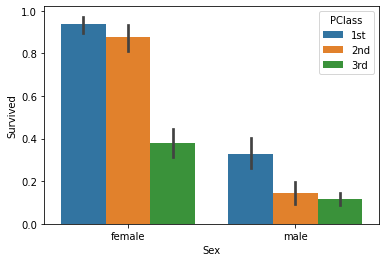

In [86]:
db = dataBilgi("titanic.csv")
karsılastırma.tablo(db.data["Survived"], db.data["Sex"],False, "died","survived")
grafikle.factorPlot("PClass", "Survived", "Sex", db.data)
grafikle.barPlot("Sex", "Survived", "PClass", db.data)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 36.0+ KB


In [3]:
data.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [43]:
survived_sex = pd.crosstab(index=data["Survived"], columns=data["Sex"])
survived_sex.index =["died", "survived"]
survived_sex

Sex,female,male
died,154,709
survived,308,142


In [6]:
survived_class = pd.crosstab(index=data["Survived"], columns=data["PClass"], normalize='index')

survived_class.columns = ["class1", "class2", "class3"]
survived_class.index = ["died", "survived"]

survived_class

,class1,class2,class3
died,0.149652,0.185615,0.664733
survived,0.428889,0.264444,0.306667


In [9]:
#pd.crosstab([data['Sex'],data['Survived']], data['PClass'], margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab([data['Sex'],data['Survived']], data['PClass'], normalize='columns').style.background_gradient(cmap='summer_r')

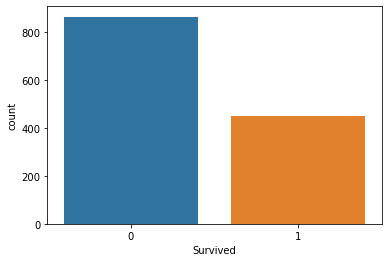

In [14]:
sns.countplot("Survived", data=data)

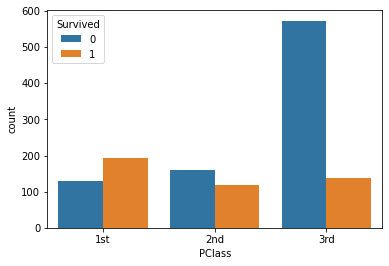

In [16]:
sns.countplot("PClass", hue="Survived", data=data)
plt.show()

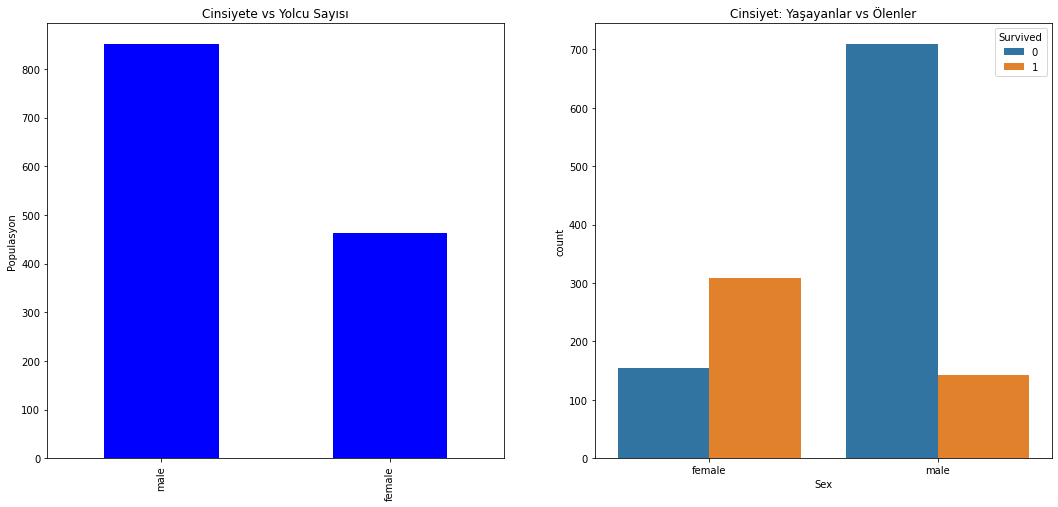

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data["Sex"].value_counts().plot.bar(color = "blue", ax = ax[0])
ax[0].set_title("Cinsiyete vs Yolcu Sayısı")
ax[0].set_ylabel("Populasyon")
sns.countplot("Sex", hue = "Survived", data = data, ax = ax[1])
ax[1].set_title("Cinsiyet: Yaşayanlar vs Ölenler")
plt.show()

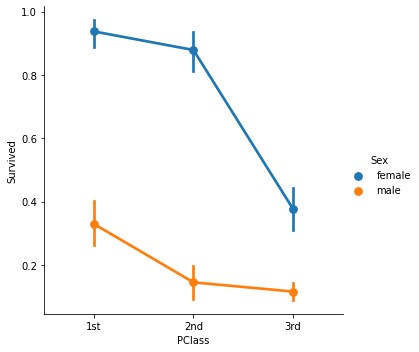

In [21]:
sns.factorplot("PClass", "Survived", hue="Sex", data=data)
plt.show()

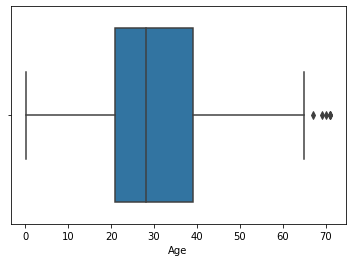

In [24]:
sns.boxplot(data["Age"])
plt.show()

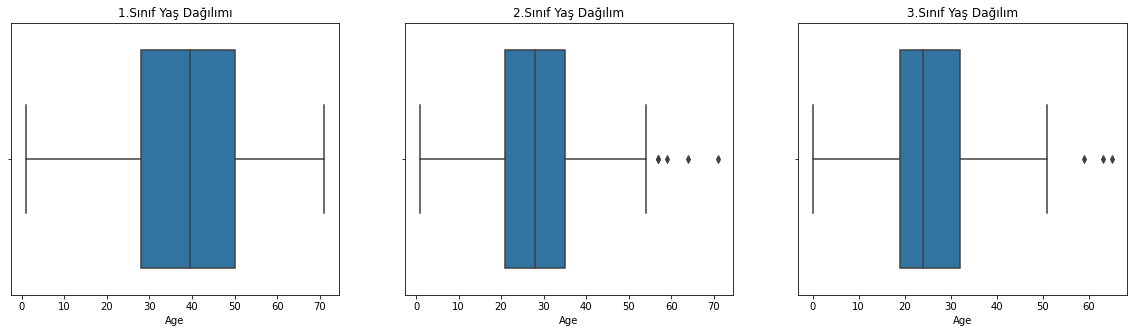

In [26]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(data[data["PClass"] == "1st"]["Age"], ax = ax[0])
ax[0].set_title("1.Sınıf Yaş Dağılımı")
sns.boxplot(data[data["PClass"] == "2nd"]["Age"], ax = ax[1])
ax[1].set_title("2.Sınıf Yaş Dağılım")
sns.boxplot(data[data["PClass"] == "3rd"]["Age"], ax = ax[2])
ax[2].set_title("3.Sınıf Yaş Dağılım")
plt.show()

In [25]:
data.groupby("PClass")["Age"].mean()

PClass
1st    39.667788
2nd    28.300142
3rd    25.208585
Name: Age, dtype: float64

In [27]:
data.groupby("PClass")["Age"].median()

PClass
1st    39.5
2nd    28.0
3rd    24.0
Name: Age, dtype: float64

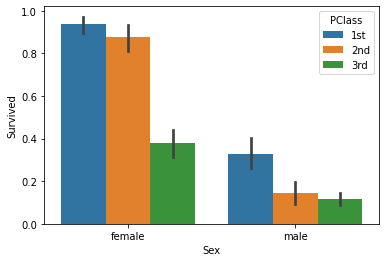

In [29]:
sns.barplot(x="Sex", y="Survived", hue="PClass", data=data)
plt.show()

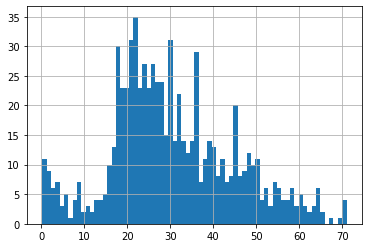

In [30]:
data["Age"].hist(bins=70)

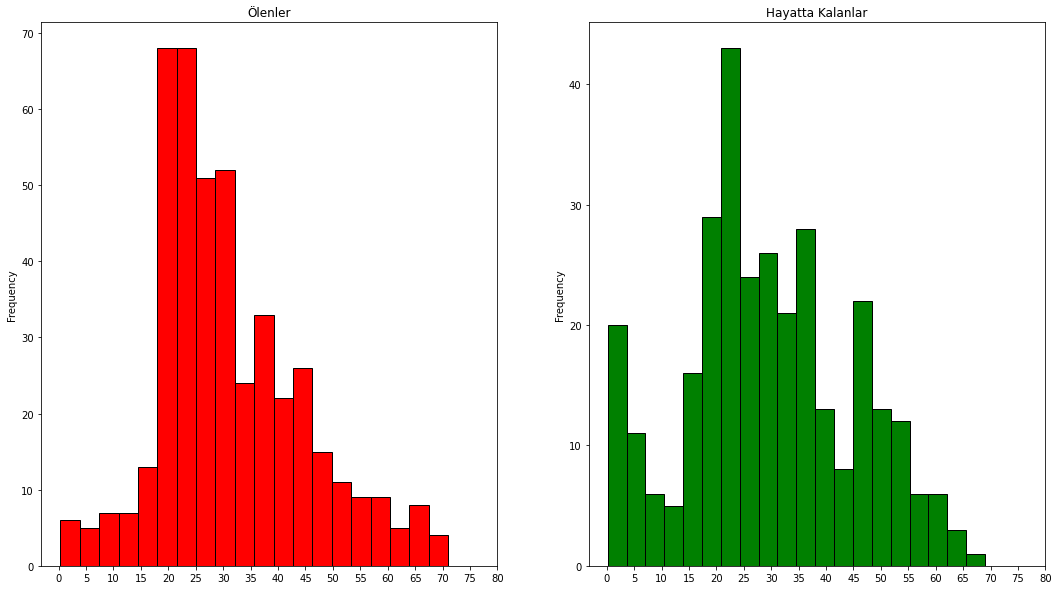

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
data[data["Survived"] == 0]["Age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "Red")
ax[0].set_title("Ölenler")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)

data[data["Survived"] == 1]["Age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("Hayatta Kalanlar")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()

In [33]:
import seaborn.apionly as sns
iris = sns.load_dataset('iris')
iris.head()

c:\python38\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'sepal width')

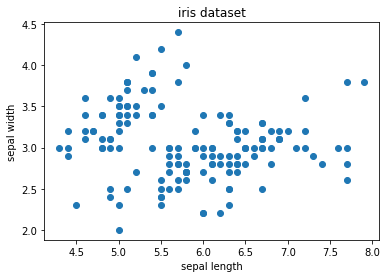

In [37]:
fig, ax = plt.subplots()

ax.scatter(iris['sepal_length'], iris['sepal_width'])

ax.set_title('iris dataset')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

Text(0, 0.5, 'sepal_width')

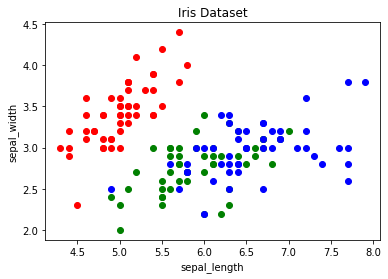

In [38]:
# create color dictionary
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['species'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

No handles with labels found to put in legend.


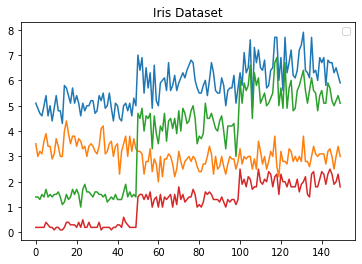

In [39]:
columns = iris.columns.drop(['species'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Count')

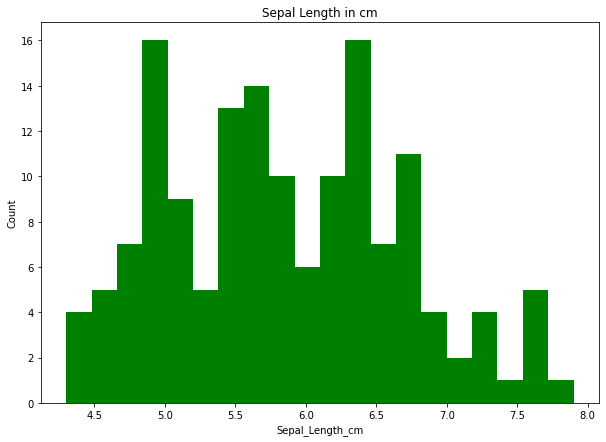

In [40]:
plt.figure(figsize = (10, 7)) 
x = iris["sepal_length"] 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 

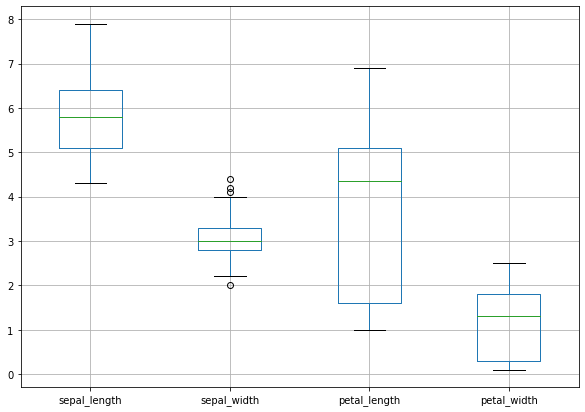

In [41]:
plt.figure(figsize = (10, 7)) 
iris.boxplot() 

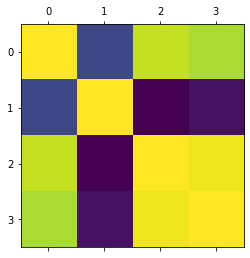

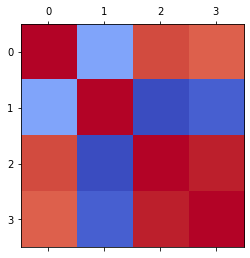

In [42]:
corr = iris.corr()
corr.style.background_gradient(cmap='coolwarm')

import matplotlib.pyplot as plt

plt.matshow(iris.corr())
plt.show()
plt.matshow(iris.corr(),cmap='coolwarm')